# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from darwinian_shift import DarwinianShift, GlobalKmerSpectrum, TranscriptKmerSpectrum, EvenMutationalSpectrum
from darwinian_shift import CDFPermutationTest, ChiSquareTest, PermutationTest
from darwinian_shift import FoldXLookup, SequenceDistanceLookup, MutationExclusionLookup, StructureDistanceLookup
from darwinian_shift import MutationExclusionLookup, ANDLookup
from darwinian_shift import hide_top_and_right_axes

In [3]:
from darwinian_shift.additional_plotting_functions import plot_scatter_two_scores

In [4]:
from darwinian_shift.utils.sifts_functions import get_sifts_alignment
import os

# Setup

In [5]:
# Define the statistical tests

cdf_perm = CDFPermutationTest(num_permutations=100000, testing_random_seed=0)  # Used to calculate p-values

chi_sq = ChiSquareTest(bins=[-0.1, 0.5, 1.1])  # Used to calculate counts for the discrete metrics

stats = [cdf_perm, chi_sq]

In [6]:
# Make a DarwinianShift object for the project. 
# This calculates the mutational spectrum, sets up the statistical tests to use, and filters the data. 
d = DarwinianShift(
    data="SMS-35_merged_sorted.txt", 
    source_genome='GRCh37',
    stats=[cdf_perm, chi_sq],
    
    # Just test with the missense mutations. Nonsense and synonymous mutations are still used to calculate the spectrum
    included_mutation_types='missense'
)

/Users/mh28/miniconda3/envs/ds/lib/python3.8/subprocess.py:849: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [7]:
plot_directory="."
    
sifts_directory="."
pdb_directory = "."

In [8]:
# Colours

unobserved_colour = '#BBBBBB'  
observed_colour = '#EE7733'

foldx_expected_colour = '#EE6677'
foldx_observed_colour = '#CC3311'

interface_expected_colour = '#88CCEE'
interface_observed_colour = '#0077BB'

calcium_expected_colour = '#8DE0D7'
calcium_observed_colour = '#009988'

In [9]:
pik3ca_section_definition = {'transcript_id':'ENST00000263967', 'included_mutation_types': 'missense',
                            'pdb_id': '4l1b', 'pdb_chain': 'A', 
                             
                             # Targets for structural distance
                            'p85_target': 'segid B'
                            
                            }

In [10]:
p85_distance_lookup = StructureDistanceLookup(pdb_directory=pdb_directory, sifts_directory=sifts_directory,
                                             download_sifts=True, boolean=False, 
                                               distance_to_alpha_carbons=False,
                                              
                                             target_key='p85_target', name='Distance from p85α') 

p85_distance_lookup_bool = ANDLookup(lookups=[p85_distance_lookup], thresholds=[5], directions=[-1])

In [11]:
d_p85 = d.change_lookup(p85_distance_lookup_bool)
s_p85 = d_p85.run_section(pik3ca_section_definition, statistics=[cdf_perm, chi_sq])

/Users/mh28/PycharmProjects/darwinian_shift/darwinian_shift/lookup_classes/combination_lookup.py:98: RuntimeWarning: invalid value encountered in less
  results[i] = score < threshold


In [12]:
s_p85.get_pvalues()['chi_square_glob_k3_binom_pvalue']  # p-value from binomial test

0.026738482920837348

In [13]:
s_p85.num_mutations

157

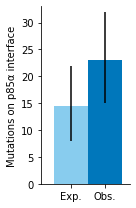

In [14]:
s_p85.plot_binned_counts(figsize=(2, 3), show_legend=False, 
                                      colours=[interface_observed_colour, interface_expected_colour])
plt.xlim(left=0.75)
plt.ylim(top=33)
plt.title("")
plt.xticks([1.1, 1.5], ['Exp.', 'Obs.'], rotation=0)
plt.ylabel('Mutations on p85α interface')
hide_top_and_right_axes(plt.gca())
plt.tight_layout()
plt.savefig(os.path.join(plot_directory,"pik3ca_bar_interface_p85.pdf"),  transparent=True);